In [2]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt


In [3]:
# problem 1
df = pd.read_csv('movie_dataset.csv')

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.041000e+03,4041.000000,4041.000000,4.041000e+03,4041.000000,4041.000000,4041.000000
mean,3.285372e+07,57982.927988,23.492294,9.695165e+07,107.493442,6.092551,784.679782
std,4.271586e+07,89651.272534,34.168782,1.734437e+08,23.434256,1.242561,1321.321087
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000e+06,8536.000000,3.674294,2.154540e+06,94.000000,5.600000,49.000000
50%,1.800000e+07,14914.000000,15.131867,3.264555e+07,104.000000,6.200000,299.000000
75%,4.500000e+07,60420.000000,31.893932,1.133741e+08,119.000000,6.800000,890.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
df.dtypes

budget               float64
genres                object
id                     int64
original_language     object
popularity           float64
release_date          object
revenue              float64
runtime              float64
title                 object
vote_average         float64
vote_count             int64
director              object
dtype: object

In [6]:
df['genres'].value_counts()

Drama                                             306
Comedy                                            239
Drama Romance                                     123
Comedy Romance                                    123
Comedy Drama                                      105
                                                 ... 
Drama Adventure Action History                      1
Adventure Fantasy Action Western Thriller           1
Adventure Drama Romance Action                      1
Action Adventure Comedy Family Science-Fiction      1
Comedy Drama Romance TV-Movie                       1
Name: genres, Length: 1045, dtype: int64

In [7]:
# problem 2
df['budget'].replace(0,np.nan,inplace=True)
df.isna().sum()

budget               599
genres                28
id                     0
original_language      0
popularity             0
release_date           1
revenue                0
runtime                0
title                  0
vote_average           0
vote_count             0
director              36
dtype: int64

In [8]:
empty = df[['original_language','genres','title','director']].apply(lambda x:x=="")
empty.value_counts()

original_language  genres  title  director
False              False   False  False       4041
dtype: int64

In [9]:
df['revenue'].fillna(df['revenue'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)
df.dropna(inplace=True)

In [10]:
df.isna().sum()

budget               0
genres               0
id                   0
original_language    0
popularity           0
release_date         0
revenue              0
runtime              0
title                0
vote_average         0
vote_count           0
director             0
dtype: int64

In [11]:
# problem 3
df['year'] = df['release_date'].apply(lambda x:x.split('-',2)[2])
df['year'].value_counts()

2006    204
2013    198
2011    196
2009    195
2010    189
       ... 
1935      1
1927      1
1916      1
1934      1
1925      1
Name: year, Length: 90, dtype: int64

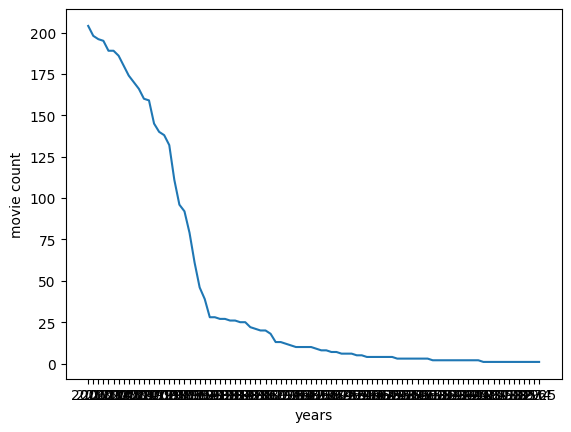

In [12]:
plt.xlabel('years')
plt.ylabel('movie count')
plt.plot(df['year'].value_counts().index,df['year'].value_counts().values)


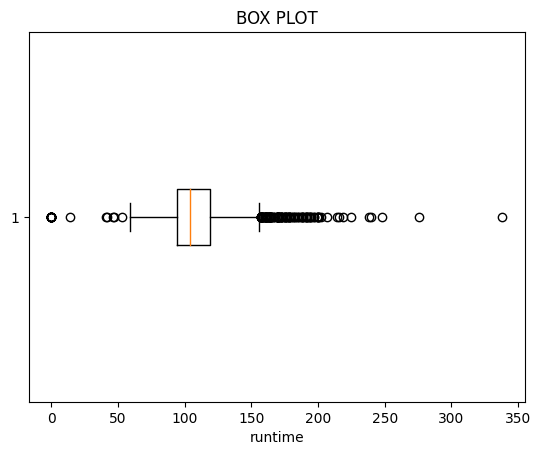

In [14]:
plt.xlabel("runtime")
plt.title("BOX PLOT")
plt.boxplot(df['runtime'],vert=False)
plt.show()